In [125]:
import numpy as np
import pandas as pd

 1.Show the dataframe shape.

In [126]:
cust_da = pd.read_csv('files_for_lab/csv_files/marketing_customer_analysis.csv')

2. Standardize header names.

In [127]:
def transf(x):
        x=x.replace(" ","_").lower()
        return x

def col_ch(y):
    cols = {}
    for c in range(y.shape[1]):
            cols[y.columns[c]]=transf(y.columns[c])
    return cols

cust_da = cust_da.rename(columns=col_ch(cust_da))

cust_da

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


3. Which columns are numerical?

In [128]:
print('the columns that are numerical are:',list(cust_da._get_numeric_data().columns))

the columns that are numerical are: ['customer_lifetime_value', 'income', 'monthly_premium_auto', 'months_since_last_claim', 'months_since_policy_inception', 'number_of_open_complaints', 'number_of_policies', 'total_claim_amount']


4. Which columns are categorical

In [129]:
print('the columns that are categorical are:',list(cust_da.select_dtypes('object').columns))

the columns that are categorical are: ['customer', 'state', 'response', 'coverage', 'education', 'effective_to_date', 'employmentstatus', 'gender', 'location_code', 'marital_status', 'policy_type', 'policy', 'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size']


5. Check and deal with `NaN` values.

In [130]:
cust_da['response'].value_counts(dropna=False)

No     7826
Yes    1308
Name: response, dtype: int64

In [131]:
cust_da['months_since_last_claim'].value_counts(dropna=False)

3     381
6     364
1     345
4     335
7     333
2     329
0     314
5     313
10    306
11    297
16    295
15    286
13    285
8     279
12    273
14    268
17    263
9     250
19    246
23    239
25    236
21    233
20    231
18    229
22    218
24    211
29    206
28    201
31    190
26    186
30    182
27    182
33    179
34    169
35    142
32    138
Name: months_since_last_claim, dtype: int64

In [132]:
cust_da['number_of_open_complaints'].value_counts(dropna=False)

0    7252
1    1011
2     374
3     292
4     149
5      56
Name: number_of_open_complaints, dtype: int64

In [133]:
cust_da['vehicle_class'].value_counts(dropna=False)

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: vehicle_class, dtype: int64

In [134]:
import statistics as sts


cust_da['vehicle_class'].fillna(sts.mode(cust_da['vehicle_class']),inplace=True)

In [135]:
cust_da['vehicle_size'].value_counts(dropna=False)

Medsize    6424
Small      1764
Large       946
Name: vehicle_size, dtype: int64

In [136]:
# cust_da['vehicle_type'].value_counts(dropna=False)
# it seems that round 3 file does not have vehicle type column

There are a lot of rows with at least 1 Nan value:

I decided to drop vechicle type because almost 1 out of 2 values is Nan and the other is only other value is A. I also replaced:

 the median for the numer of months since last claim as the distribution is on lower values
 
 0 instead of the number of open complaints as it is better to assume that clients with open complaints will be adequately labeled

 No where response is missing as if there is a missing value it is better to assume no response.

 THhen I decided to drop any rows containing null values for vehicle type, vehicle size and state as these could be quite important information for analysis.

In [137]:
cust_da['months_since_last_claim'].fillna(np.median(cust_da['months_since_last_claim'].drop(list(cust_da[cust_da['months_since_last_claim'].isna()].T),axis=0)),inplace=True)
cust_da['number_of_open_complaints'].fillna(0, inplace=True)
cust_da['response'].fillna('No', inplace=True)
# cust_da.drop(labels=('vehicle_type'), axis=1,inplace=True)
cust_da.drop(list(cust_da[cust_da['state'].isna() | cust_da['vehicle_size'].isna() | cust_da['vehicle_class'].isna()].T.columns),axis=0,inplace=True)
cust_da.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [138]:
cust_da.shape

(9134, 24)

6. Datetime format - Extract the months from the dataset and store in a separate column. Then filter the data to show only the information for the first quarter , ie. January, February and March. _Hint_: If data from March does not exist, consider only January and February.

months_col = []

cust_da['months_col']=cust_da['effective_to_date'][:cust_da['effective_to_date'].str.index['/']]

In [139]:


def month(x):
    x = x[:x.index('/')]
    return x

cust_da['months_col']=cust_da['effective_to_date'].apply(month)

cust_da[cust_da['months_col'].isin(['1','2','3'])]

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,months_col
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,1
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,1
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize,2
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize,2
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize,2
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large,2


Show DataFrame info.

Show a plot of the response rate by the total claim amount.
Show a plot of the response rate by income.

In [140]:
cust_da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       9134 non-null   object 
 1   state                          9134 non-null   object 
 2   customer_lifetime_value        9134 non-null   float64
 3   response                       9134 non-null   object 
 4   coverage                       9134 non-null   object 
 5   education                      9134 non-null   object 
 6   effective_to_date              9134 non-null   object 
 7   employmentstatus               9134 non-null   object 
 8   gender                         9134 non-null   object 
 9   income                         9134 non-null   int64  
 10  location_code                  9134 non-null   object 
 11  marital_status                 9134 non-null   object 
 12  monthly_premium_auto           9134 non-null   i

In [141]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Describe DataFrame

In [142]:
cust_da.describe()


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


Show a plot of the total number of responses.

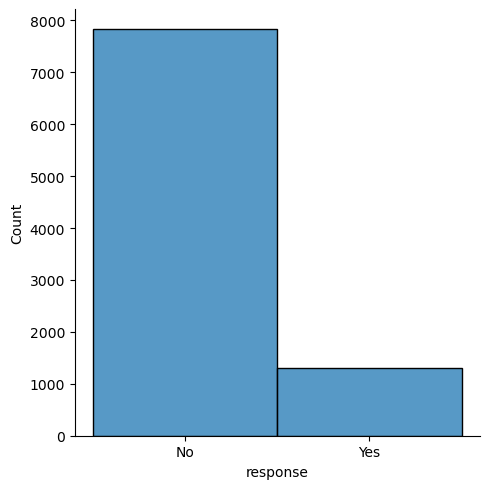

In [143]:
sns.displot(cust_da['response'])

Show a plot of the response rate by the sales channel.

<AxesSubplot:xlabel='sales_channel', ylabel='count'>

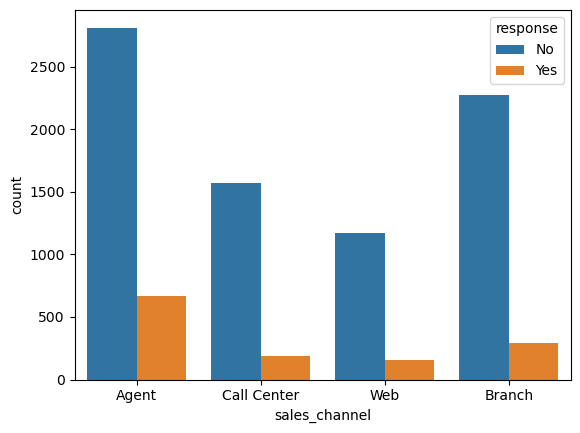

In [144]:
sns.countplot(data=cust_da, x='sales_channel', hue='response')

Show a plot of the response rate by the total claim amount.

<AxesSubplot:xlabel='response', ylabel='total_claim_amount'>

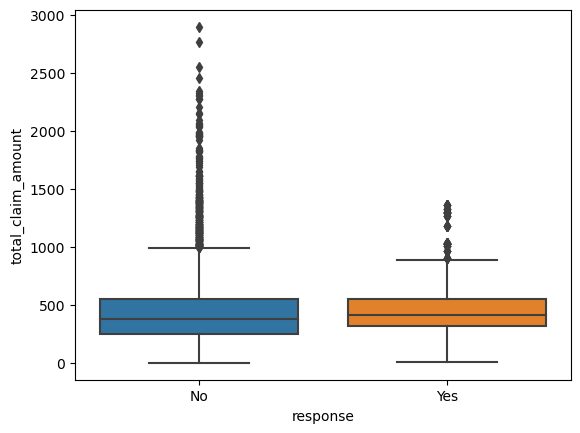

In [242]:
sns.boxplot(data=cust_da[['total_claim_amount','response']],x="response",y="total_claim_amount")

Show a plot of the response rate by income.

<AxesSubplot:xlabel='response', ylabel='income'>

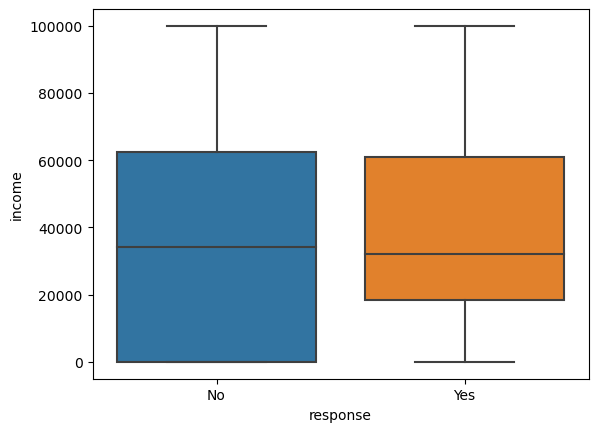

In [244]:
sns.boxplot(data=cust_da[['income','response']],x="response",y="income")